In [106]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.plots import image
from plottable.plots import bar, percentile_bars, percentile_stars, progress_donut
from plottable.formatters import decimal_to_percent


In [107]:
df=pd.read_html("https://fbref.com/en/comps/9/Premier-League-Stats",attrs={"id":"results2024-202591_overall"})[0]
df

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Liverpool,24,17,6,1,58,23,35,57,2.38,54.5,21.8,32.7,1.36,D W W W D,60289,Mohamed Salah - 22,Alisson,NaN
1,2,Arsenal,24,14,8,2,49,22,27,50,2.08,38.6,21.2,17.4,0.73,D W D W W,60276,Kai Havertz - 9,David Raya,NaN
2,3,Nott'ham Forest,24,14,5,5,40,27,13,47,1.96,31.7,26.7,5.0,0.21,W D W L W,30056,Chris Wood - 17,Matz Sels,NaN
3,4,Chelsea,25,12,7,6,47,34,13,43,1.72,49.2,35.6,13.5,0.54,D W L W L,39608,Cole Palmer - 14,Robert Sánchez,NaN
4,5,Manchester City,24,12,5,7,48,35,13,41,1.71,44.2,34.1,10.0,0.42,W D W W L,52944,Erling Haaland - 19,Ederson,NaN
5,6,Newcastle Utd,24,12,5,7,42,29,13,41,1.71,41.3,29.4,11.9,0.49,W W L W L,52186,Alexander Isak - 17,Nick Pope,NaN
6,7,Bournemouth,24,11,7,6,41,28,13,40,1.67,45.6,31.2,14.4,0.60,W D W W L,11213,Justin Kluivert - 11,Kepa Arrizabalaga,NaN
7,8,Brighton,25,9,10,6,38,38,0,37,1.48,33.7,36.9,-3.1,-0.12,W W L L W,32398,"Danny Welbeck, Kaoru Mitoma - 6",Bart Verbruggen,NaN
8,9,Aston Villa,24,10,7,7,34,37,-3,37,1.54,34.2,29.8,4.4,0.18,W W D D L,41878,Ollie Watkins - 10,Emiliano Martínez,NaN
9,10,Fulham,24,9,9,6,36,32,4,36,1.50,33.9,27.6,6.3,0.26,D L W L W,26480,Raúl Jiménez - 9,Bernd Leno,NaN


In [108]:
df['Squad'].unique()

array(['Liverpool', 'Arsenal', "Nott'ham Forest", 'Chelsea',
       'Manchester City', 'Newcastle Utd', 'Bournemouth', 'Brighton',
       'Aston Villa', 'Fulham', 'Brentford', 'Crystal Palace',
       'Manchester Utd', 'Tottenham', 'Everton', 'West Ham', 'Wolves',
       'Leicester City', 'Ipswich Town', 'Southampton'], dtype=object)

In [109]:
df['Badge']=df['Squad'].apply(
    lambda x: f"C://Users//user//Desktop//Github//Projects//FBREF//premier legue badges//{x}.png"
)

In [110]:
df.columns

Index(['Rk', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP',
       'xG', 'xGA', 'xGD', 'xGD/90', 'Last 5', 'Attendance', 'Top Team Scorer',
       'Goalkeeper', 'Notes', 'Badge'],
      dtype='object')

In [111]:
df=df[[
    'Rk', 'Badge', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP',
    'xG', 'xGA', 'xGD', 'xGD/90'
]]

In [153]:
bg_color="#ffffff"
text_color="#000000"
row_color={
    'top4':'#B8D576',
    'top6':'#FFD95F',
    'bottom3':'#D2665A',
    'even':'#877666',
    'odd':'#002E2C'
}
plt.rcParams["text.color"]=text_color
plt.rcParams['font.family']='monospace'

In [113]:
df.columns

Index(['Rk', 'Badge', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts',
       'Pts/MP', 'xG', 'xGA', 'xGD', 'xGD/90'],
      dtype='object')

In [143]:
col_defs=[
    ColumnDefinition(
        name="Rk",
        textprops={'ha':'center'},
        width=0.5
    ),
    ColumnDefinition(
        name="Badge",
        textprops={'ha':'center','va':'center','color':bg_color},
        width=0.5,
        plot_fn=image
    ),
    ColumnDefinition(
        name="Squad",
        textprops={'ha':'left','fontweight':'bold'},
        width=1.75
    ),
        ColumnDefinition(
        name="MP",
        group="Matches Played",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="W",
        group="Matches Played",
        textprops={"ha": "center"},
        width=0.5,
        text_cmap=matplotlib.cm.PiYG
    ),
    ColumnDefinition(
        name="D",
        group="Matches Played",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="L",
        group="Matches Played",
        textprops={"ha": "center"},
        width=0.5,
        # plot_fn=bar,
        # plot_kw={
        #     'cmap':normed_cmap(df['L'],matplotlib.cm.PiYG_r,num_stds=2),
        #     # 'formatter':decimal_to_percent,
        #     # 'annotate':True,
        #         }  
    ),
    ColumnDefinition(
        name="GF",
        group="Goals",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="GA",
        group="Goals",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="GD",
        group="Goals",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="Pts",
        group="Points",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="Pts/MP",
        group="Points",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="xG",
        group="Expected Goals",
        textprops={"ha": "center", "color": "#000000", "weight": "bold", "bbox": {"boxstyle": "circle", "pad": 0.35}},
        cmap=normed_cmap(df["xG"], cmap=matplotlib.cm.PiYG, num_stds=2)
    ),
    ColumnDefinition(
        name="xGA",
        group="Expected Goals",
        textprops={"ha": "center", "color": "#000000", "weight": "bold", "bbox": {"boxstyle": "circle", "pad": 0.35}},
        cmap=normed_cmap(df["xGA"], cmap=matplotlib.cm.PiYG_r, num_stds=2)
    ),
    ColumnDefinition(
        name="xGD",
        group="Expected Goals",
        textprops={"ha": "center", "color": "#000000", "weight": "bold", "bbox": {"boxstyle": "circle", "pad": 0.35}},
        cmap=normed_cmap(df["xGD"], cmap=matplotlib.cm.PiYG, num_stds=2)
    )
]

In [115]:
col_defs

[ColumnDefinition(name='Rk', title=None, width=0.5, textprops={'ha': 'center'}, formatter=None, cmap=None, text_cmap=None, group=None, plot_fn=None, plot_kw={}, border=None),
 ColumnDefinition(name='Badge', title=None, width=0.5, textprops={'ha': 'center', 'va': 'center', 'color': '#ffffff'}, formatter=None, cmap=None, text_cmap=None, group=None, plot_fn=<function image at 0x000001FD231E1DA0>, plot_kw={}, border=None),
 ColumnDefinition(name='Squad', title=None, width=1.75, textprops={'ha': 'left', 'fontweight': 'bold'}, formatter=None, cmap=None, text_cmap=None, group=None, plot_fn=None, plot_kw={}, border=None),
 ColumnDefinition(name='MP', title=None, width=0.5, textprops={'ha': 'center'}, formatter=None, cmap=None, text_cmap=None, group='Matches Played', plot_fn=None, plot_kw={}, border=None),
 ColumnDefinition(name='W', title=None, width=0.5, textprops={'ha': 'center'}, formatter=None, cmap=None, text_cmap=<matplotlib.colors.LinearSegmentedColormap object at 0x000001FD20E8E870>, g

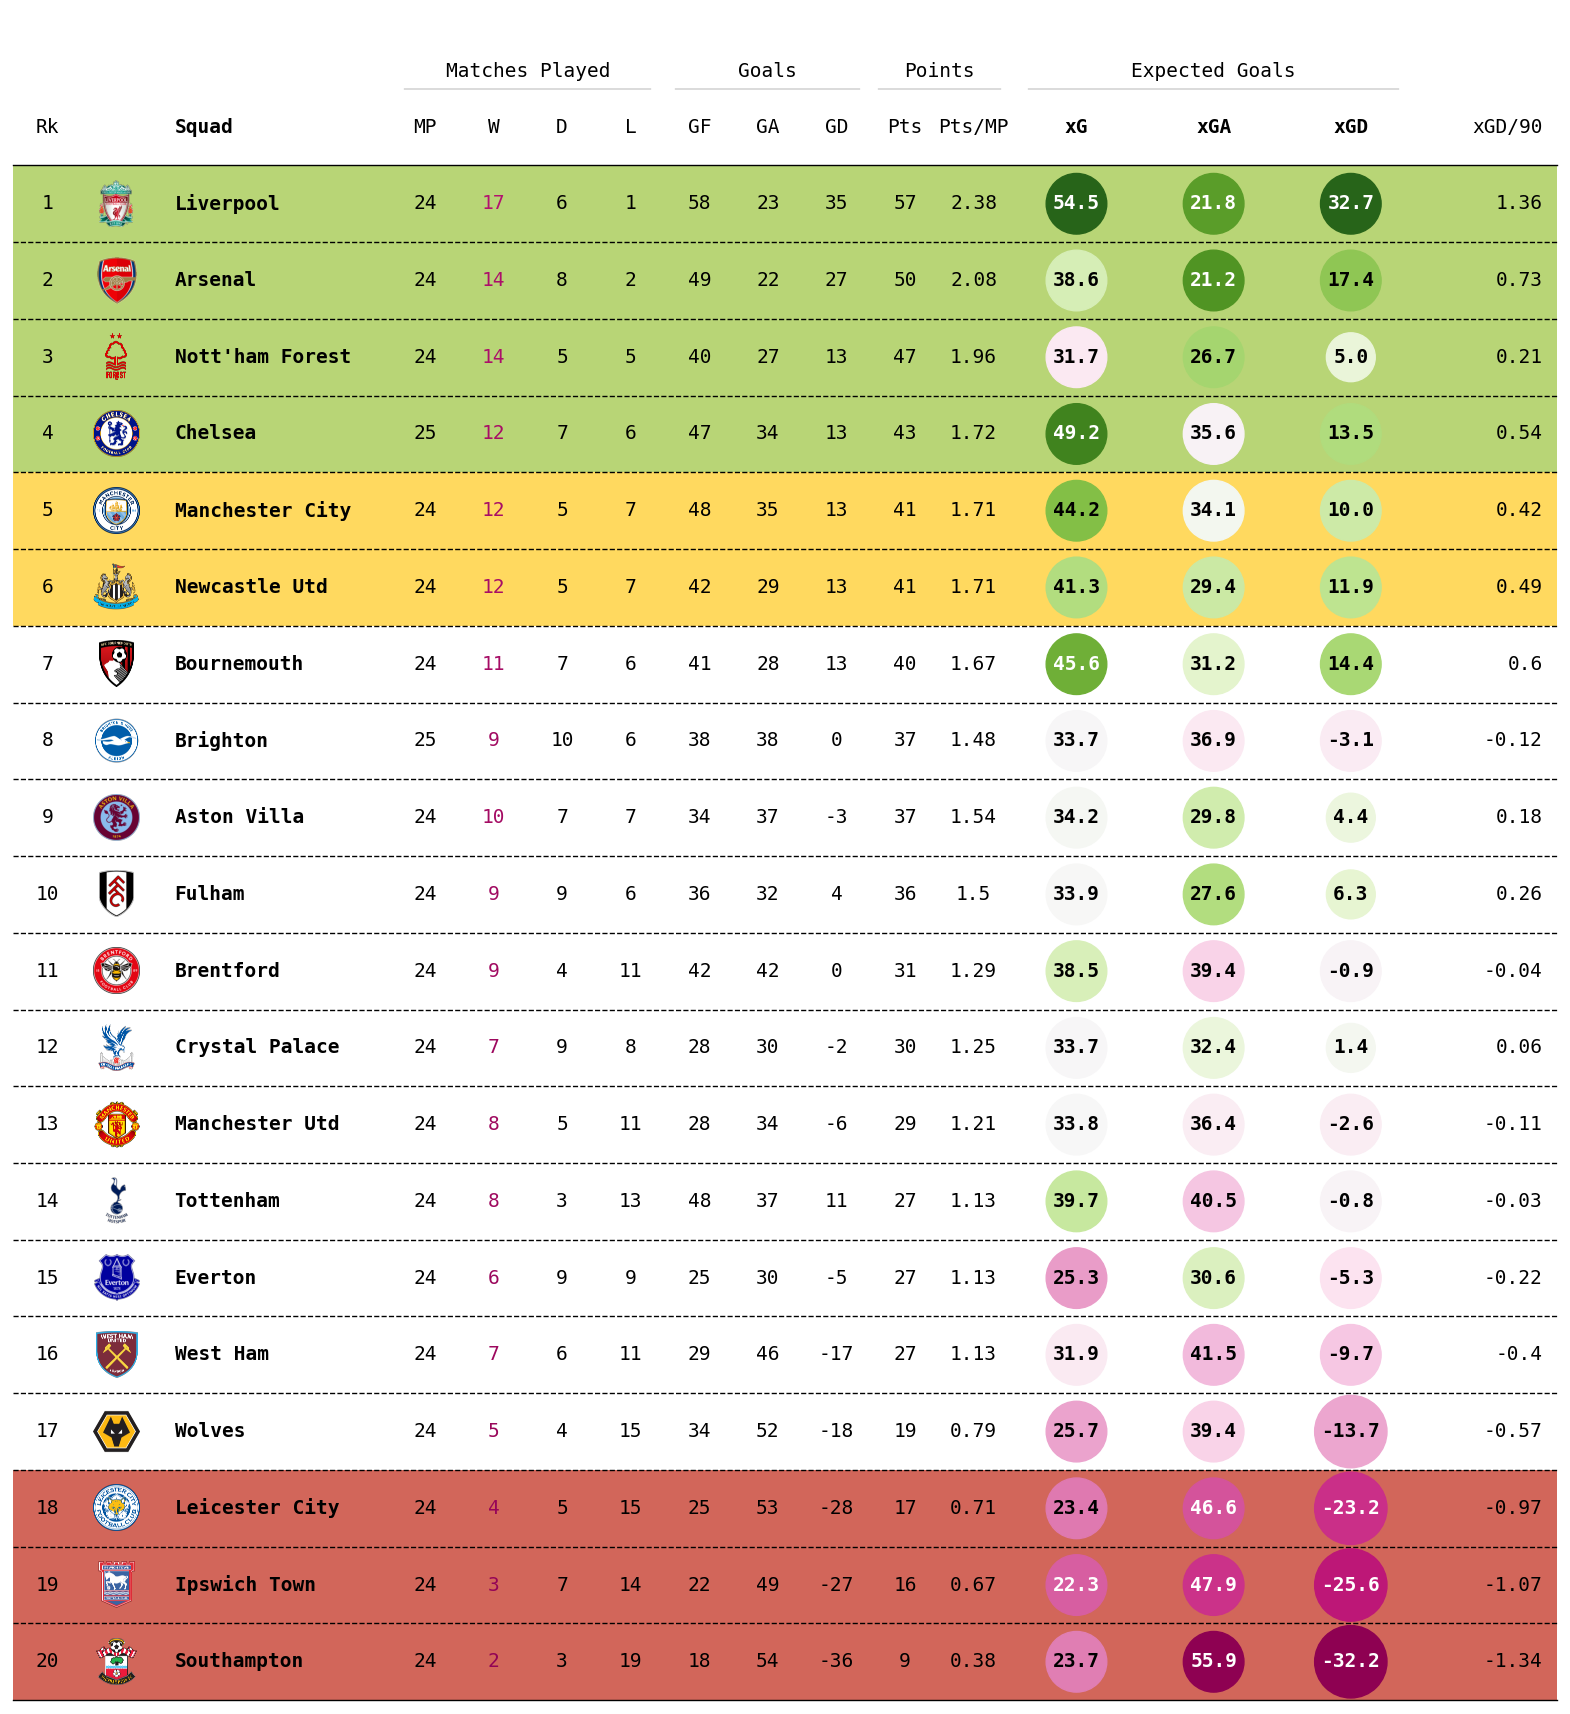

In [155]:
fig, ax = plt.subplots(figsize=(20, 22))
fig.set_facecolor(bg_color)
ax.set_facecolor(bg_color)
table = Table(
    df,
    column_definitions=col_defs,
    index_col="Rk",
    row_dividers=True,
    row_divider_kw={"linewidth": 1, "linestyle": '--'},
    footer_divider=True,
    textprops={"fontsize": 14},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
    column_border_kw={"linewidth": .5, "linestyle": "-"},
    ax=ax,
).autoset_fontcolors(colnames=["xG", "xGA", "xGD"]) # This will set the font color of the columns based on the cmap so the text is readable
table.cells[10, 3].textprops["color"] = "#8ACB88"

for m in [0,1,2,3]:
    table.rows[m].set_facecolor(row_color["top4"])
for m in [4,5]:
    table.rows[m].set_facecolor(row_color["top6"])
for m in [17,18,19]:
    table.rows[m].set_facecolor(row_color["bottom3"])

plt.show()

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      20 non-null     int64  
 1   Badge   20 non-null     object 
 2   Squad   20 non-null     object 
 3   MP      20 non-null     int64  
 4   W       20 non-null     int64  
 5   D       20 non-null     int64  
 6   L       20 non-null     int64  
 7   GF      20 non-null     int64  
 8   GA      20 non-null     int64  
 9   GD      20 non-null     int64  
 10  Pts     20 non-null     int64  
 11  Pts/MP  20 non-null     float64
 12  xG      20 non-null     float64
 13  xGA     20 non-null     float64
 14  xGD     20 non-null     float64
 15  xGD/90  20 non-null     float64
dtypes: float64(5), int64(9), object(2)
memory usage: 2.6+ KB
